# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [3]:
#Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [4]:
#Code:
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [5]:
#Code:

sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [6]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:

sat_2017: We've got data for each state's participation, reading/verbal, math, and total scores. There's an incredibly wide range of participation that varies from state to state from 2% up to 100%. Also, I think there may be at least one error, because I highly doubt the average math score in Maryland was a 52 out of 800. Perhaps some of the participation values are errors too. Other than that, the averages seem like they could be realistic.

act_2017: We've got data for each state's participation, English, math, reading, science, and composite scores. Like with the SAT scores, here there is also a wide range of participation from 8% up to 100%. Scores have low values hovering around 2/36 and going up to 25 or 26 out of 36. Also, there appears to be a typo in Wyoming's composite score.

#### 4a. Does the data look complete? 

Answer: It looks complete, yes, in that there are no empty values. However, some of these values might be errors like I listed above.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: Maryland's average math score on the 2017 SAT is in fact 524, not 52.

The min/max possible scores on the SAT are 0/1600 with 0/800 for each part.

The min/max possible scores on the ACT are 0/36 with 0/36 for each part too.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [7]:
# notice the syntax here that is used to assign the integer 524 as a value to that particular cell.
# There's a comma inside the brackets, clearly indicating ROW, COLUMN

sat_2017.loc[20, 'Math'] = 524

In [8]:
# This syntax, unlike the one above, is used to ask what the value of a particular [row][column] is, but
# this syntax cannot be used to reassign its value. You can only change the value using the above syntax.

sat_2017.loc[20]['Math']

524

In [9]:
act_2017.loc[51, "Composite"] = 20.2
act_2017.loc[51, "Composite"]

20.2

In [10]:
act_2017.loc[0, "Composite"] = 21.0
act_2017.loc[0, "Composite"]

21.0

#### 5. What are your data types? 
Display the data types of each feature. 

In [11]:
#code

sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [12]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: The participation type in both .csv files is listed as an object, even though it's a number. Also, the Composite series in the ACT csv should be floats, not objects.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [13]:
#
sat_2017['Participation'] = sat_2017['Participation'].map(lambda x: str(x).replace('%',''))
act_2017['Participation'] = act_2017['Participation'].map(lambda x: str(x).replace('%',''))

In [14]:
sat_2017['Participation'] = sat_2017['Participation'].astype(float)
act_2017['Participation'] = act_2017['Participation'].astype(float)

- Fix any individual values preventing other columns from being the appropriate type.

In [15]:
# already fixed act_2017 typo listed above in 4C

- Finish your data modifications by making sure the columns are now typed appropriately.

In [16]:
act_2017['Composite'] = act_2017['Composite'].astype(float)

- Display the data types again to confirm they are correct.

In [17]:
print(sat_2017.dtypes)
act_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object


State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [18]:
#code

sat_2017 = sat_2017.rename({'State': 'state', "'17 SAT Participation": "'17 sat_partic", "'17 SAT Language": "'17 sat_language",'2017 SAT Math':"'17 sat_math", "'17 SAT total":"'17 sat_total"}, axis='columns')
act_2017 = act_2017.rename({'State': 'state', "'17 ACT Participation": "'17_act_partic", "'17 ACT English": "'17_act_english", "'17 ACT Math": "'17_act_math","'17 ACT Reading": "'17_act_reading", "'17 ACT Science": "'17_act_science", "'17 ACT Composite": "'17_act_composite"}, axis='columns')

In [19]:
lst = []
for col in act_2017.columns: 
    lst.append(col)
lst

['state',
 'Participation',
 'English',
 'Math',
 'Reading',
 'Science',
 'Composite']

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [20]:
# act_2017.drop(act_2017.index[0])
# Don't want to do it again and accidentally delete another row, so had to put the #

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [21]:
combined_17 = pd.merge(sat_2017, act_2017, on ='state')

In [22]:
combined_17.head()

,state,Participation_x,Evidence-Based Reading and Writing,Math_x,Total,Participation_y,English,Math_y,Reading,Science,Composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [23]:
combined_17.to_csv('combined_17.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [24]:
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')

In [25]:
sat_2018['Participation'] = sat_2018['Participation'].map(lambda x: str(x).replace('%',''))
act_2018['Participation'] = act_2018['Participation'].map(lambda x: str(x).replace('%',''))

In [26]:
sat_2018['Participation'] = sat_2018['Participation'].astype(float)
act_2018['Participation'] = act_2018['Participation'].astype(float)

In [27]:
sat_2018 = sat_2018.rename({'State': 'state', 'Participation': "'18_sat_partic", "Evidence-Based Reading and Writing": "'18_sat_language",'Math':"'18_sat_math", "Total":"'18_sat_total"}, axis='columns')
act_2018 = act_2018.rename({'State': 'state', "Participation": "'18_act_partic", "Composite": "'18_act_composite"}, axis='columns')

In [28]:
lst3 = []
for col in act_2018.columns: 
    lst3.append(col)
lst3

['state', "'18_act_partic", "'18_act_composite"]

In [29]:
sat_2018.head()

,state,'18_sat_partic,'18_sat_language,'18_sat_math,'18_sat_total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [30]:
act_2018.head(10)

,state,'18_act_partic,'18_act_composite
0,Alabama,100.0,19.1
1,Alaska,33.0,20.8
2,Arizona,66.0,19.2
3,Arkansas,100.0,19.4
4,California,27.0,22.7
5,Colorado,30.0,23.9
6,Connecticut,26.0,25.6
7,Delaware,17.0,23.8
8,District of columbia,32.0,23.6
9,Florida,66.0,19.9


In [31]:
act_2018['state'][8] = 'District of Columbia'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
act_2018['state'][8]

'District of Columbia'

In [33]:
combined_18 = pd.merge(sat_2018, act_2018, on ='state')

In [34]:
combined_18.to_csv('combined_18.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [35]:
combined_all = pd.merge(combined_17, combined_18, on ='state')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [36]:
#Code:
combined_all.head()

,state,Participation_x,Evidence-Based Reading and Writing,Math_x,Total,Participation_y,English,Math_y,Reading,Science,Composite,'18_sat_partic,'18_sat_language,'18_sat_math,'18_sat_total,'18_act_partic,'18_act_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595,571,1166,100.0,19.1
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8,43.0,562,544,1106,33.0,20.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7,29.0,577,572,1149,66.0,19.2
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4,5.0,592,576,1169,100.0,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8,60.0,540,536,1076,27.0,22.7


In [37]:
combined_all.dtypes

state                                  object
Participation_x                       float64
Evidence-Based Reading and Writing      int64
Math_x                                  int64
Total                                   int64
Participation_y                       float64
English                               float64
Math_y                                float64
Reading                               float64
Science                               float64
Composite                             float64
'18_sat_partic                        float64
'18_sat_language                        int64
'18_sat_math                            int64
'18_sat_total                           int64
'18_act_partic                        float64
'18_act_composite                     float64
dtype: object

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [38]:
#code

list5 = [1, 2, 3, 4, 5, 6]
def stand_dev(lst):
    avg = sum(lst) / len(lst)
    new_list = []
    for i in lst:
        everything_else = (avg - i) ** 2 / len(lst)
        new_list.append(everything_else)
    inside = sum(new_list) / len(lst)
    answer = inside ** 0.5
    return answer

stand_dev(list5)

0.6972166887783964

In [39]:
np.std(combined_all['Math_x'])

46.8851359849938

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 

*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [40]:
#Code:

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [41]:
#code

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [42]:
numericals = combined_all

numericals.drop(columns =['state'], inplace=True)

numericals.head();

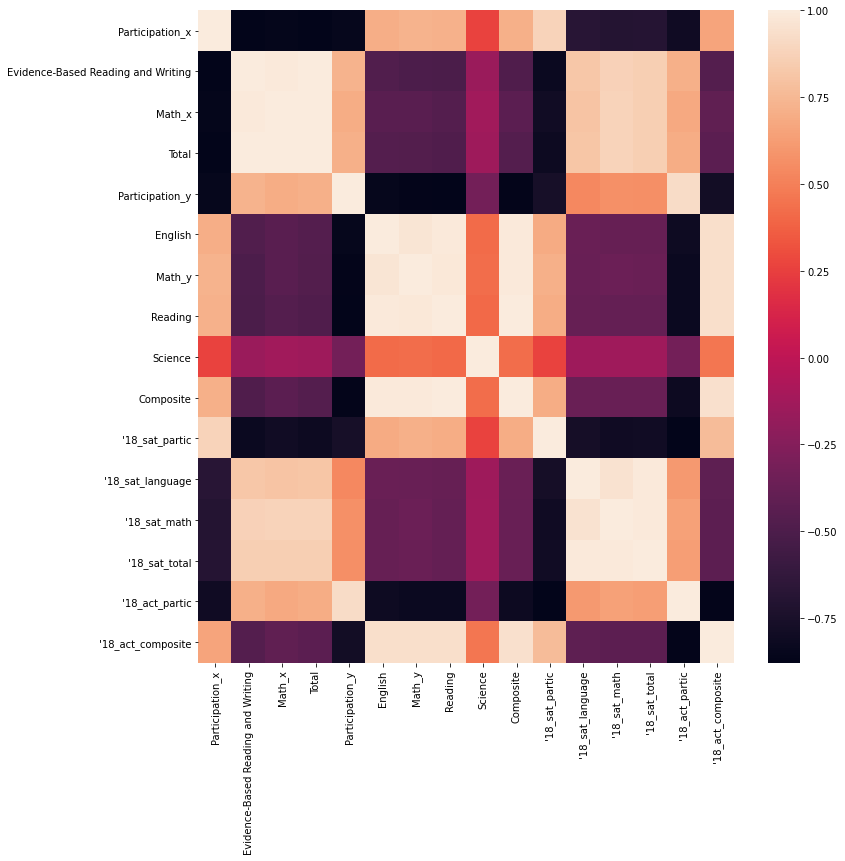

In [43]:
plt.figure(figsize=(12,12))
sns.heatmap(numericals.corr());

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [54]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        plt.title(list_of_titles)
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [45]:
combined_all.head()

,Participation_x,Evidence-Based Reading and Writing,Math_x,Total,Participation_y,English,Math_y,Reading,Science,Composite,'18_sat_partic,'18_sat_language,'18_sat_math,'18_sat_total,'18_act_partic,'18_act_composite
0,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595,571,1166,100.0,19.1
1,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8,43.0,562,544,1106,33.0,20.8
2,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7,29.0,577,572,1149,66.0,19.2
3,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4,5.0,592,576,1169,100.0,19.4
4,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8,60.0,540,536,1076,27.0,22.7


In [49]:
df_columns = list(combined_all.columns)

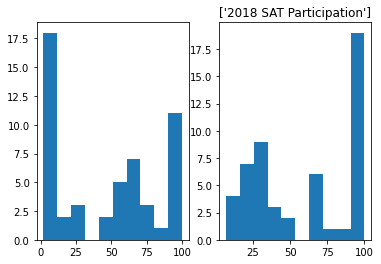

In [58]:
# combined_all['Participation_x'].hist()

# 2017 SAT participation
subplot_histograms(combined_all,
                   ["'18_sat_partic", "'18_act_partic"],
                   ['2018 SAT Participation'],
                   ['xlabel_a', 'xlabel_b'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa601689b10>,
      dtype=object)

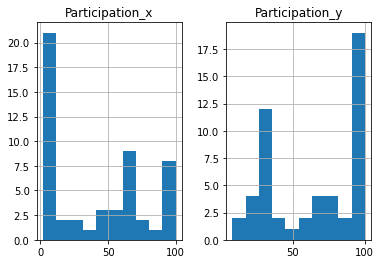

In [61]:
combined_all[['Participation_x', 'Participation_y']].hist()

# 2017 ACT participation


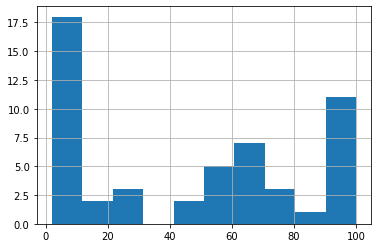

In [46]:
combined_all["'18_sat_partic"].hist()


# 2018 SAT Participation

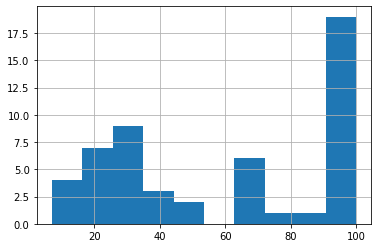

In [47]:
combined_all["'18_act_partic"].hist()

# 2018 ACT Participation


#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [48]:
combined_all.head()

,Participation_x,Evidence-Based Reading and Writing,Math_x,Total,Participation_y,English,Math_y,Reading,Science,Composite,'18_sat_partic,'18_sat_language,'18_sat_math,'18_sat_total,'18_act_partic,'18_act_composite
0,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595,571,1166,100.0,19.1
1,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8,43.0,562,544,1106,33.0,20.8
2,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7,29.0,577,572,1149,66.0,19.2
3,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4,5.0,592,576,1169,100.0,19.4
4,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8,60.0,540,536,1076,27.0,22.7


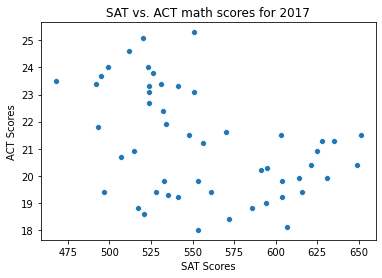

In [63]:
# working on this with Greenspan

# Codeplt.figure(figsize=(10,6)) # (width, height)
plt.title("SAT vs. ACT math scores for 2017")
sns.scatterplot(combined_all["Math_x"], combined_all["Math_y"])
plt.xlabel("SAT Scores")
plt.ylabel("ACT Scores");

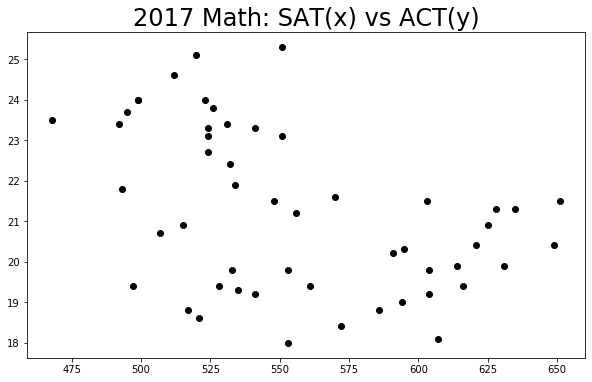

In [49]:
# Create a figure.
plt.figure(figsize=(10,6))

# Generate a scatterplot of our data.
plt.scatter(combined_all['Math_x'],
            combined_all['Math_y'],
            color = 'black')
# Create a title.
plt.title('2017 Math: SAT(x) vs ACT(y)', fontsize = 24);

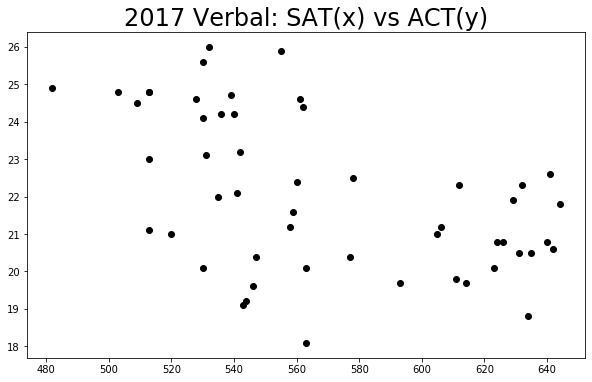

In [50]:
# Create a figure.
plt.figure(figsize=(10,6))

# Generate a scatterplot of our data.
plt.scatter(combined_all['Evidence-Based Reading and Writing'],
            combined_all['Reading'],
            color = 'black')
# Create a title.
plt.title('2017 Verbal: SAT(x) vs ACT(y)', fontsize = 24);

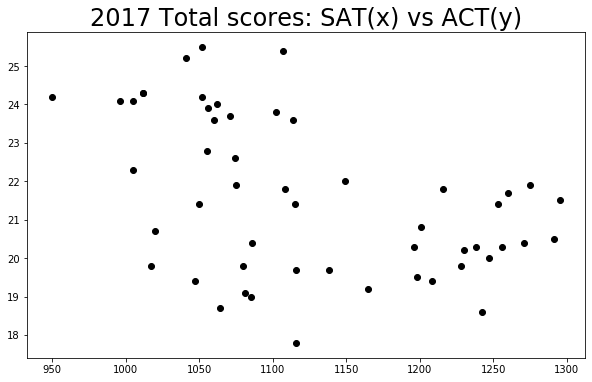

In [51]:
# Create a figure.
plt.figure(figsize=(10,6))

# Generate a scatterplot of our data.
plt.scatter(combined_all['Total'],
            combined_all['Composite'],
            color = 'black')
# Create a title.
plt.title('2017 Total scores: SAT(x) vs ACT(y)', fontsize = 24);

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [52]:
# Code

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

## Bonus: Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [53]:
# Code: